In [58]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [59]:
np.random.seed(42)
X = np.random.rand(100,5)
y = X @ np.array([1.5,-2.0,1.0,0.5,-1.0]) + np.random.normal(0,0.1,100)

In [60]:
print(X)

[[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
 [0.15599452 0.05808361 0.86617615 0.60111501 0.70807258]
 [0.02058449 0.96990985 0.83244264 0.21233911 0.18182497]
 [0.18340451 0.30424224 0.52475643 0.43194502 0.29122914]
 [0.61185289 0.13949386 0.29214465 0.36636184 0.45606998]
 [0.78517596 0.19967378 0.51423444 0.59241457 0.04645041]
 [0.60754485 0.17052412 0.06505159 0.94888554 0.96563203]
 [0.80839735 0.30461377 0.09767211 0.68423303 0.44015249]
 [0.12203823 0.49517691 0.03438852 0.9093204  0.25877998]
 [0.66252228 0.31171108 0.52006802 0.54671028 0.18485446]
 [0.96958463 0.77513282 0.93949894 0.89482735 0.59789998]
 [0.92187424 0.0884925  0.19598286 0.04522729 0.32533033]
 [0.38867729 0.27134903 0.82873751 0.35675333 0.28093451]
 [0.54269608 0.14092422 0.80219698 0.07455064 0.98688694]
 [0.77224477 0.19871568 0.00552212 0.81546143 0.70685734]
 [0.72900717 0.77127035 0.07404465 0.35846573 0.11586906]
 [0.86310343 0.62329813 0.33089802 0.06355835 0.31098232]
 [0.32518332 0

In [61]:
print(y)

[-0.43013829  0.76410271 -1.05711335  0.05843171  0.56820574  1.59159961
  0.01210804  0.78615049 -0.45908372  0.93201241  0.52181048  1.23447976
  0.75504355  0.50856267  0.30788851 -0.37155899  0.10027813 -0.3577904
 -1.02164829  0.08987188 -1.67136423  0.33190486  0.82456825 -0.15520207
 -0.3647666  -0.75437271 -0.62574728 -0.51195749  1.33618492 -0.98887497
  0.44236104 -0.81739869  0.21612004  0.2341586   1.16941383 -0.22721235
  1.36517774  0.03086257 -0.71230077 -0.23045591  0.70275194  0.38468215
 -0.40293057 -0.24871527 -0.25619342 -1.57597749  0.78792183  0.76382911
  0.73755355  1.13897438  0.67444436 -0.29123391 -1.70605933  0.30020449
  0.44457168 -0.64243069  0.29656727 -0.79111263  0.71624242 -0.24773616
 -0.81526812  0.78690676  0.12085251  0.12140401 -0.76632071  0.66744129
 -1.05387864 -0.7565127  -0.27092253 -0.81894904 -0.29938623  1.28749859
 -0.97009    -0.52913005  0.67595356 -1.05910942 -0.95359183  0.40846242
  1.06871058 -0.29289979 -0.99057184  1.01287422 -0.

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)
X_val_train,X_val_test,y_val_train,y_val_test = train_test_split(X_train,y_train,test_size=0.5,random_state=42)


In [63]:
def ridge_regression(X, y, lam):
    n_features = X.shape[1]
    I = np.eye(n_features)
    return np.linalg.inv(X.T @ X + lam * I) @ X.T @ y

In [64]:
lambdas = np.logspace(-4,4,100)
validation_mse = []

for lam in lambdas :
    beta = ridge_regression(X_val_train,y_val_train,lam)
    y_val_pred = X_val_test @ beta
    mse = mean_squared_error(y_val_test,y_val_pred)
    validation_mse.append(mse)

In [66]:
optimal_lambda = lambdas[np.argmin(validation_mse)]

final_beta = ridge_regression(X_train,y_train,optimal_lambda)
y_pred = X_test@final_beta
test_mse = mean_squared_error(y_pred,y_test)
r2score = r2_score(y_test,y_pred)
print("Optimal lambda: ", optimal_lambda)
print("Final beta: ", final_beta)
print("Test MSE: ", test_mse)
print("R2 score: ", r2score)


Optimal lambda:  0.09770099572992257
Final beta:  [ 1.44984393 -1.99090766  1.05239505  0.5204002  -1.03048109]
Test MSE:  0.011405447243350835
R2 score:  0.9826567352641935


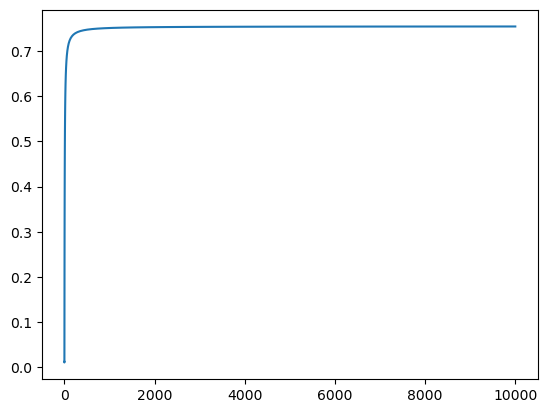

In [40]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.plot(lambdas,validation_mse)

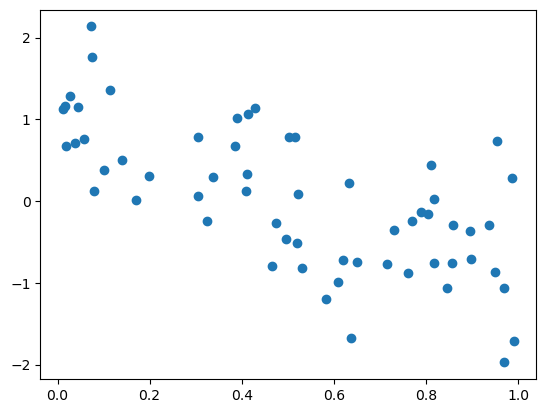

In [41]:
plt.scatter(X_train[:,1],y_train)